<a href="https://colab.research.google.com/github/JesusChristOurGod/BlockchainStruggles/blob/main/HW_6_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
dataset <- read.csv("music_genre.csv")
set.seed(42)
dataset <- dataset[sample(nrow(dataset), 20000), ]
head(dataset)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
34020,63392,1000mods,Road to Burn,41,0.01260,0.260,529233,0.684,6.46e-01,F,0.114,-9.513,Major,0.0390,105.26100000000001,4-Apr,0.200,Blues
8826,25017,Masashi Sada,片恋,27,0.96700,0.538,255533,0.151,6.28e-03,B,0.121,-13.453,Major,0.0296,135.997,4-Apr,0.353,Anime
46208,56620,Usher,Nice & Slow,64,0.15300,0.819,227907,0.299,0.00e+00,F,0.300,-11.964,Minor,0.1220,121.913,4-Apr,0.515,Hip-Hop
47128,73380,Metro Boomin,Dreamcatcher (feat. Swae Lee & Travis Scott),75,0.19100,0.675,211920,0.230,0.00e+00,C#,0.104,-10.363,Minor,0.2040,173.96200000000002,4-Apr,0.101,Hip-Hop
16740,91111,The Neighbourhood,Ferrari,50,0.00235,0.442,184173,0.652,1.06e-06,B,0.500,-8.636,Minor,0.0405,75.57600000000001,4-Apr,0.180,Alternative
7700,31571,Poppin'Party,Home Street,30,0.01160,0.628,228000,0.936,0.00e+00,E,0.385,-1.985,Major,0.0327,105.01700000000001,4-Apr,0.953,Anime


In [3]:
dataset<-unique(dataset)
empties <- dataset[dataset$artist_name == "empty_field", ]
cat("There are", nrow(empties), "rows where artist_name is 'empty_field'.\n")
head(empties)
dataset <- subset(dataset, artist_name != "empty_field")
dataset <- subset(dataset, music_genre != "")

There are 1016 rows where artist_name is 'empty_field'.


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
33700,76326,empty_field,(You Make Me Feel Like) a Natural Woman [with the Royal Philharmonic Orchestra],33,0.3770,0.519,-1,0.374,0.000,C,0.0767,-8.878,Major,0.0272,111.336,3-Apr,0.422,Blues
49074,86913,empty_field,Culture National Anthem - Outro,54,0.1370,0.713,283114,0.545,0.000,C,0.1100,-6.903,Major,0.0762,140.035,4-Apr,0.277,Hip-Hop
47144,39554,empty_field,Innamission,57,0.8360,0.754,135361,0.518,0.000,C,0.4610,-8.521,Major,0.3210,114.18,4-Apr,0.423,Hip-Hop
36078,45196,empty_field,Hate My Life,60,0.0162,0.508,190547,0.828,0.000,C#,0.2660,-4.065,Major,0.0330,125.868,4-Apr,0.449,Rock
29020,51602,empty_field,Liquor Locker,69,0.0579,0.598,258120,0.441,0.000,F#,0.0635,-7.128,Minor,0.1550,79.175,4-Apr,0.481,Rap
13439,67718,empty_field,Through the Years,32,0.9720,0.425,218933,0.105,0.862,D#,0.1100,-15.694,Major,0.0502,?,3-Apr,0.151,Jazz


## Задание 2

In [4]:
genres <- unique(dataset$music_genre)
genre_freq <- table(dataset$music_genre)
genre_freq <- sort(genre_freq, decreasing = TRUE)

genre_pct <- round(100 * genre_freq / sum(genre_freq), 2)
print(genre_pct)



      Anime  Electronic        Jazz       Blues        Rock     Country 
      10.40       10.33       10.15       10.12        9.98        9.94 
        Rap     Hip-Hop   Classical Alternative 
       9.87        9.83        9.75        9.64 


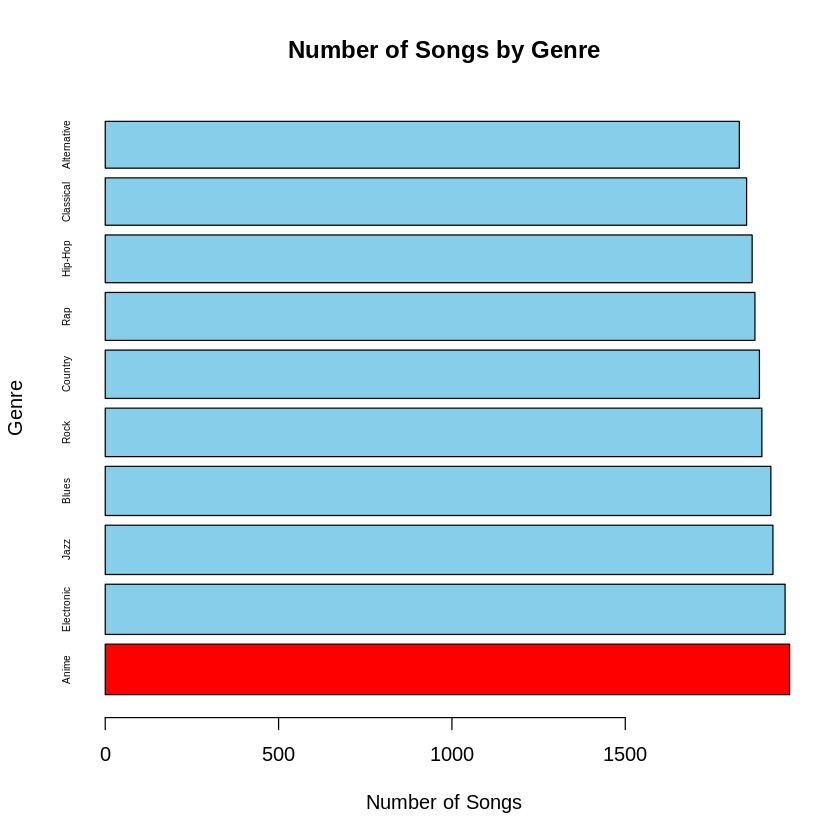

In [5]:
max_index <- which.max(genre_freq)

colors <- c(rep("skyblue", length(genres)))
colors[max_index] <- "red"

barplot(genre_freq, horiz = TRUE, col = colors,
        xlab = "Number of Songs", ylab = "Genre", main = "Number of Songs by Genre",
        width = genre_freq/100, cex.names = 0.5)




In [6]:
max_danceability <- -999999
most_danceable <- " "
for (genre in genres) {
  danceability <- mean(subset(dataset, music_genre == genre)$danceability)
  if (danceability > max_danceability) {
    max_danceability <- danceability
    most_danceable <- genre
  }
}
print(most_danceable)


[1] "Hip-Hop"


In [7]:
for (genre in genres) {
  if (sum(subset(dataset, music_genre == genre)$mode == "Major") > sum(subset(dataset, music_genre == genre)$mode == "Minor")) {
    mode <- "Major"
  } else {
    mode <- "Minor"
  }
  print(paste(genre,":", mode))
}


[1] "Blues : Major"
[1] "Anime : Major"
[1] "Hip-Hop : Major"
[1] "Alternative : Major"
[1] "Rock : Major"
[1] "Classical : Major"
[1] "Jazz : Major"
[1] "Rap : Major"
[1] "Country : Major"
[1] "Electronic : Major"


##Задание 3

In [8]:
artist_counts <-sort(table(dataset$artist_name), decreasing=TRUE)
top_artist <- names(artist_counts)[which.max(artist_counts)]
worst_artist <- names(artist_counts)[which.min(artist_counts)]

print(paste(top_artist,", ", worst_artist))

[1] "Nobuo Uematsu ,  (Hed) P.E."


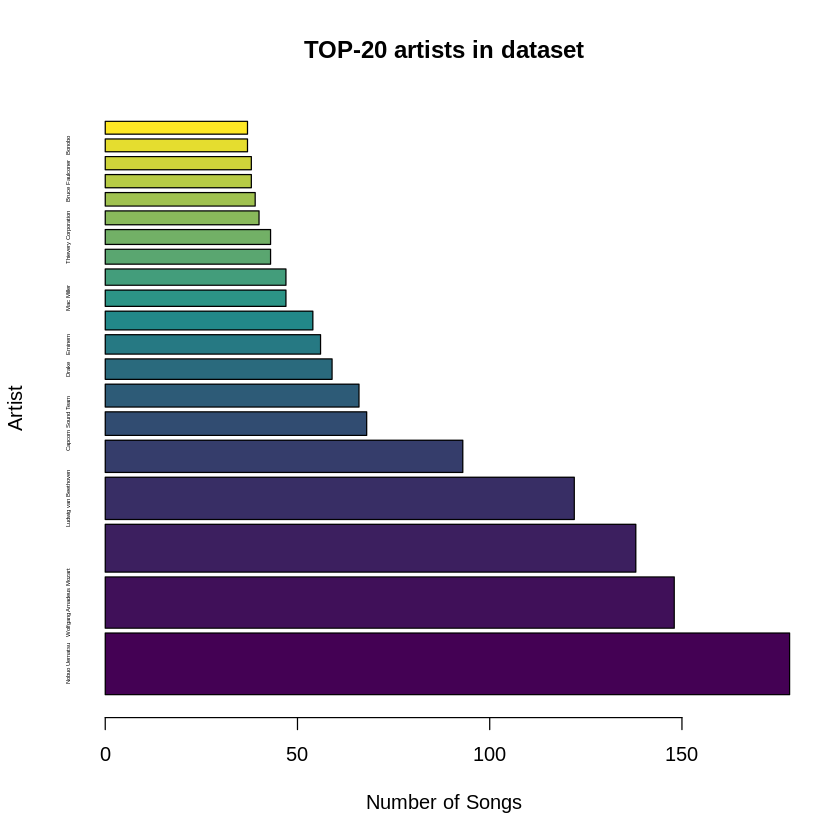

In [9]:
top20 <- artist_counts[1:20]
barplot(top20, horiz=TRUE,col = colorRampPalette(c("#440154", "#21908C", "#FDE725"))(20), xlab = "Number of Songs", ylab = "Artist", main = "TOP-20 artists in dataset",
        width = top20/100, cex.names = 0.3)

## Задание 4

In [10]:
numeric_dataset <- dataset[, sapply(dataset, is.numeric)]

numeric_dataset <-subset(numeric_dataset, select = -(instance_id))
corr_matrix <-cor(numeric_dataset)
corr_matrix

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.00000000,-0.28791617,0.35189904,-0.08030015,0.20956595,-0.36160323,-0.04292933,0.3138459,0.21520528,0.11907727
acousticness,-0.28791617,1.00000000,-0.34238227,0.05659705,-0.78834069,0.38020441,-0.10930332,-0.7292758,-0.15462125,-0.26835249
danceability,0.35189904,-0.34238227,1.00000000,-0.15905410,0.26370303,-0.29306326,-0.04015803,0.3875410,0.27967084,0.43479130
duration_ms,-0.08030015,0.05659705,-0.15905410,1.00000000,-0.06576551,0.12930526,0.01946126,-0.1032747,-0.08356903,-0.12388971
energy,0.20956595,-0.78834069,0.26370303,-0.06576551,1.00000000,-0.38272380,0.18681281,0.8380546,0.15021215,0.39290219
instrumentalness,-0.36160323,0.38020441,-0.29306326,0.12930526,-0.38272380,1.00000000,-0.09115845,-0.5205843,-0.19875490,-0.26792264
liveness,-0.04292933,-0.10930332,-0.04015803,0.01946126,0.18681281,-0.09115845,1.00000000,0.1283836,0.11956233,0.05333965
loudness,0.31384588,-0.72927576,0.38754098,-0.10327470,0.83805461,-0.52058430,0.12838362,1.0000000,0.15993362,0.33665821
speechiness,0.21520528,-0.15462125,0.27967084,-0.08356903,0.15021215,-0.19875490,0.11956233,0.1599336,1.00000000,0.06596963
valence,0.11907727,-0.26835249,0.43479130,-0.12388971,0.39290219,-0.26792264,0.05333965,0.3366582,0.06596963,1.00000000


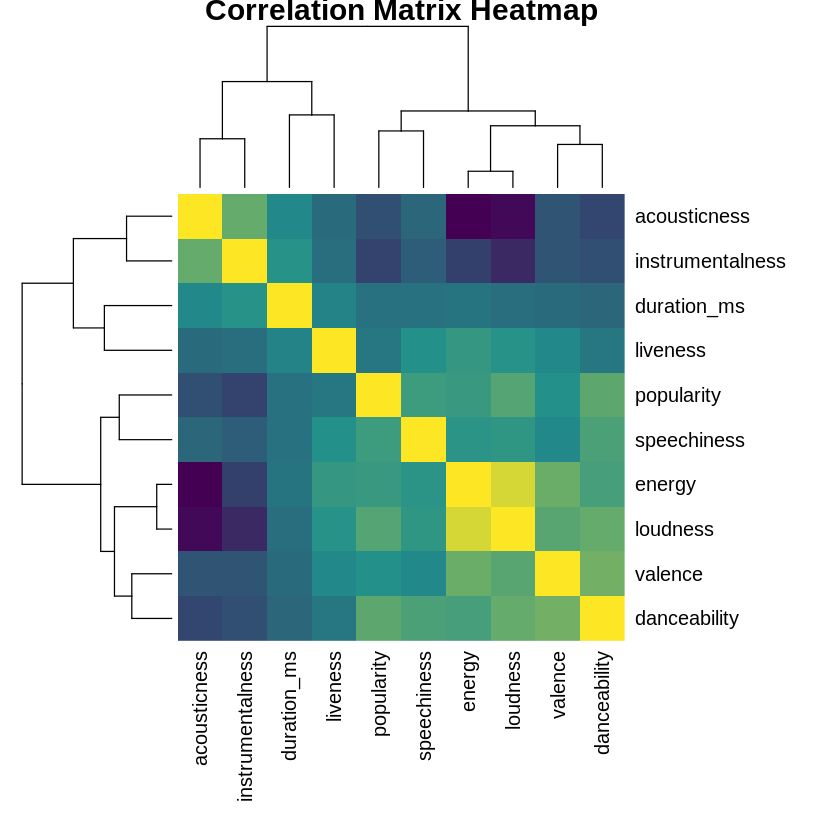

In [11]:
heatmap(corr_matrix, 
        symm = TRUE,  
        margins = c(10, 10),  
        col = colorRampPalette(c("#440154", "#21908C", "#FDE725"))(100),  
        main = "Correlation Matrix Heatmap")

##Задание 5

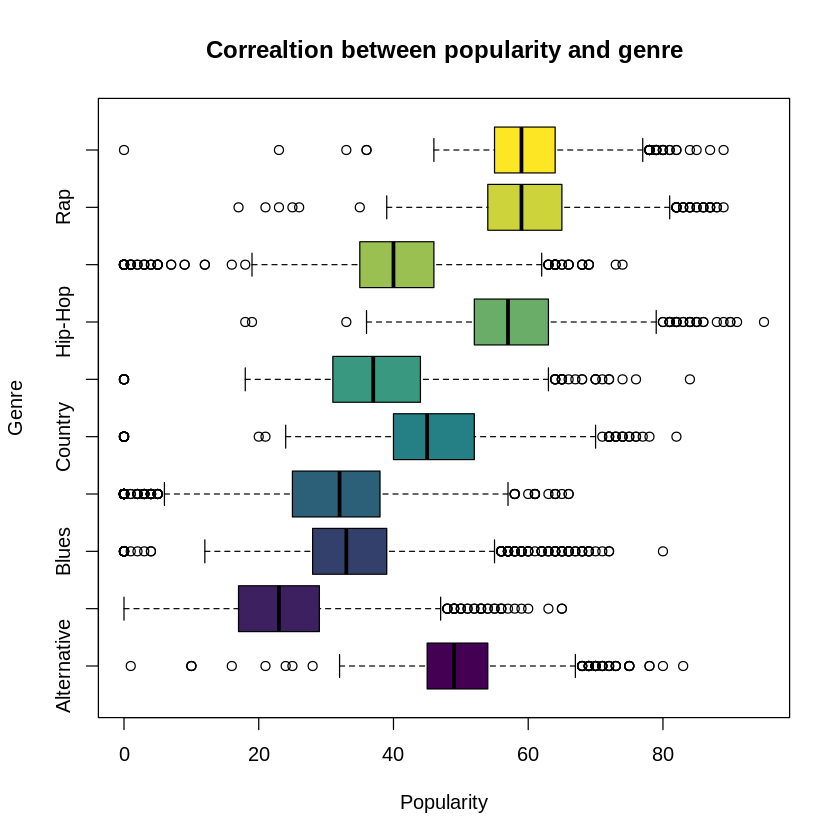

In [12]:
boxplot(dataset$popularity~dataset$music_genre,
main = "Correaltion between popularity and genre",
horizontal=TRUE,
        col = colorRampPalette(c("#440154", "#21908C", "#FDE725"))(10),  
xlab = "Popularity",
ylab = "Genre",

)

##Задание 7

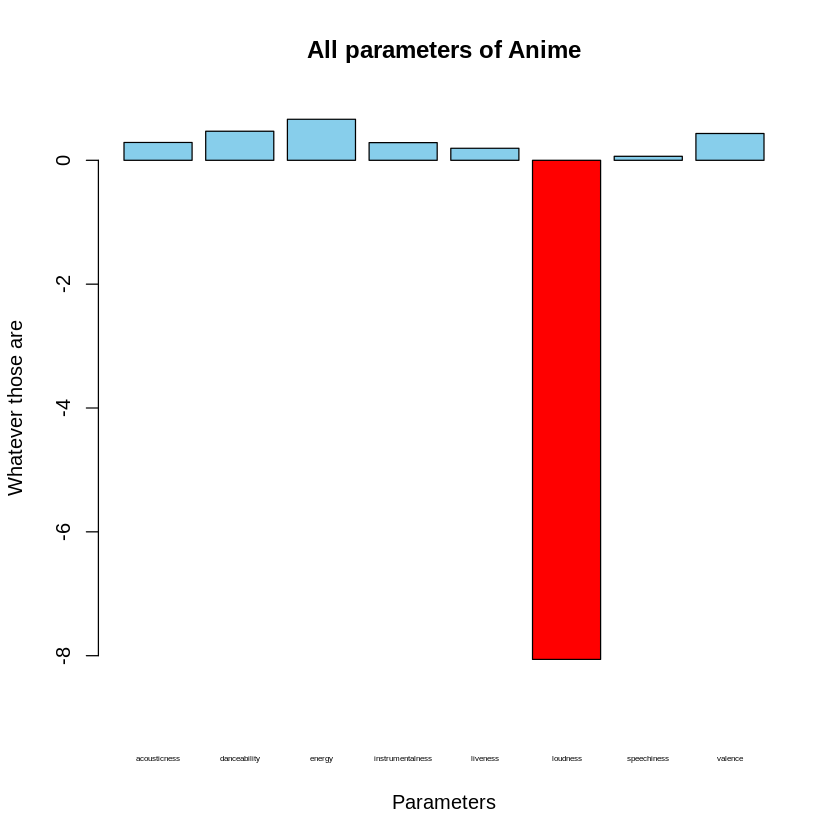

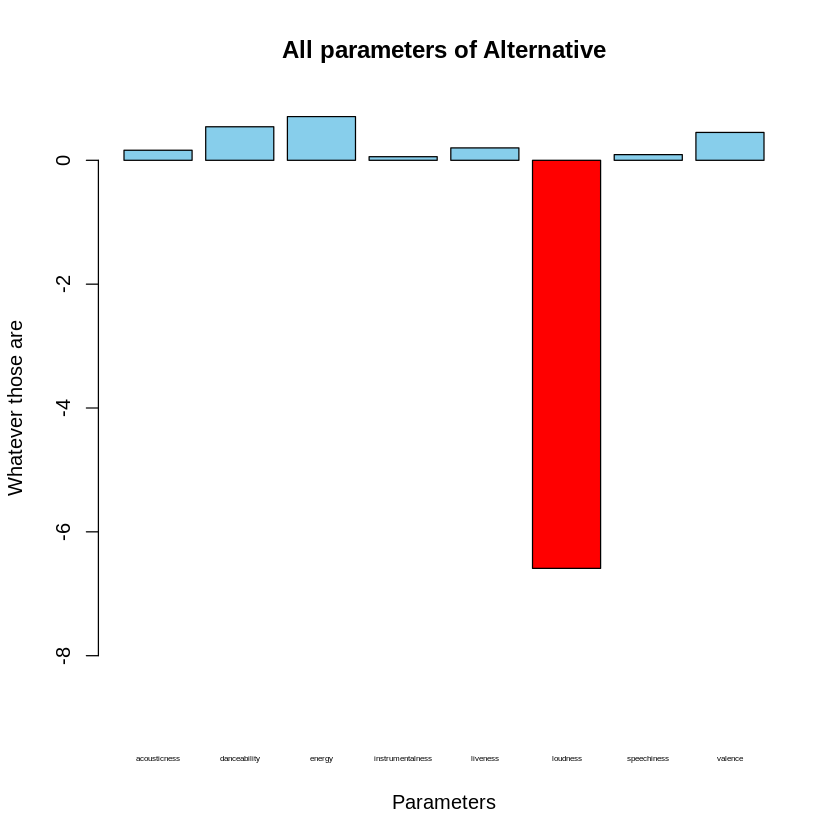

In [18]:
for (i in c(1,length(genre_freq))) {

  top_genre_data <- subset(dataset, dataset$music_genre==names(genre_freq[i]))
  top_genre_data <- top_genre_data[, sapply(top_genre_data, is.numeric)]
  top_genre_data <- subset(top_genre_data, select = -c(instance_id, popularity, duration_ms))
  mean_values <- colMeans(top_genre_data)
  column_names <- colnames(top_genre_data)

  max_index <- which.min(mean_values)

  colors <- c(rep("skyblue", length(mean_values)))
  colors[max_index] <- "red"
  barplot(height=mean_values,
      names = column_names,
      ylim=c(-9,1),
      col=colors,
      main = paste("All parameters of",names(genre_freq[i]) ), ylab = "Whatever those are", xlab = "Parameters",
      cex.names=0.4,
      
  )
}

##Задание 8

In [19]:
durations <-dataset$duration_ms
time_category <- c()
for (i in durations) {
  if (i/60000>5) {
    time_category <- append(time_category, "Длинная")
  } else if (i/60000 <3) {
    time_category <- append(time_category, "Короткая")
  } else {
        time_category <- append(time_category, "Средняя")

  }
}
dataset$длительность_трека <- time_category
head(dataset)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
34020,63392,1000mods,Road to Burn,41,0.01260,0.260,529233,0.684,6.46e-01,F,0.114,-9.513,Major,0.0390,105.26100000000001,4-Apr,0.200,Blues,Длинная
8826,25017,Masashi Sada,片恋,27,0.96700,0.538,255533,0.151,6.28e-03,B,0.121,-13.453,Major,0.0296,135.997,4-Apr,0.353,Anime,Средняя
46208,56620,Usher,Nice & Slow,64,0.15300,0.819,227907,0.299,0.00e+00,F,0.300,-11.964,Minor,0.1220,121.913,4-Apr,0.515,Hip-Hop,Средняя
47128,73380,Metro Boomin,Dreamcatcher (feat. Swae Lee & Travis Scott),75,0.19100,0.675,211920,0.230,0.00e+00,C#,0.104,-10.363,Minor,0.2040,173.96200000000002,4-Apr,0.101,Hip-Hop,Средняя
16740,91111,The Neighbourhood,Ferrari,50,0.00235,0.442,184173,0.652,1.06e-06,B,0.500,-8.636,Minor,0.0405,75.57600000000001,4-Apr,0.180,Alternative,Средняя
7700,31571,Poppin'Party,Home Street,30,0.01160,0.628,228000,0.936,0.00e+00,E,0.385,-1.985,Major,0.0327,105.01700000000001,4-Apr,0.953,Anime,Средняя


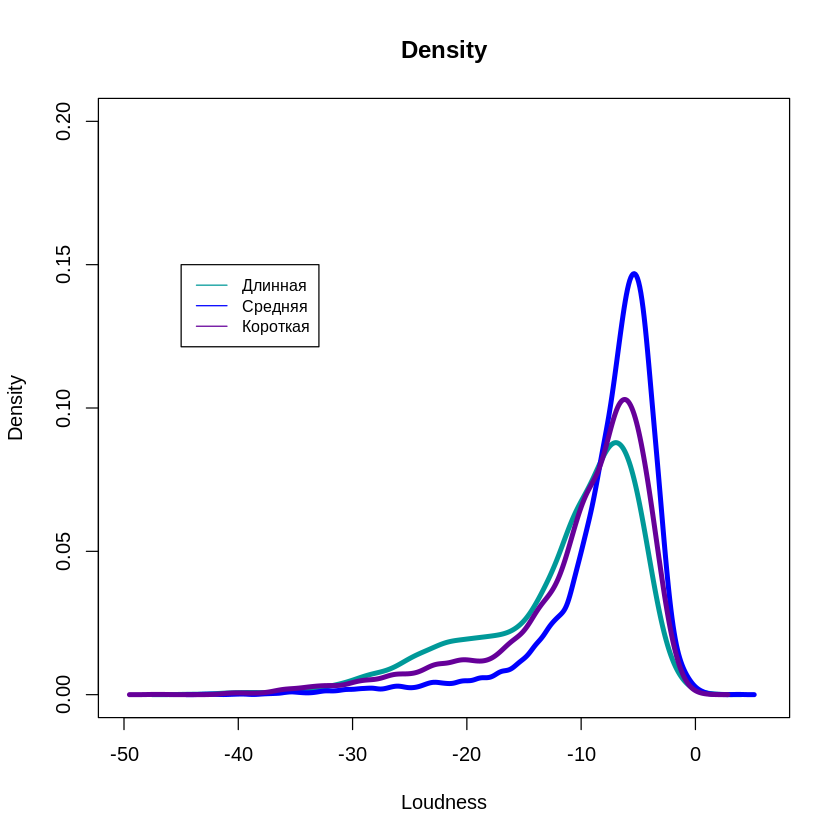

In [20]:
plot(NULL, xlim=c(-50,6), ylim=c(0, 0.2), ylab="Density", xlab="Loudness", main = "Density")
pl_colors = c("#009999", "#0000FF", "#660099")
for (i in unique(time_category)) {
    dens = density(subset(dataset,длительность_трека==i)$loudness)
    lines(dens$x, dens$y,  col=pl_colors[match(i,unique(time_category) )], lwd=4)

}
legend(-45, 0.15, legend=c("Длинная", "Средняя", "Короткая"),
       col=pl_colors, lty=1, cex=0.8)

